# Drug recommender system for patients with hepatitis c indication

In [1]:
from __future__ import division
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from difflib import SequenceMatcher

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading the cleaned dataset

In [2]:
df=pd.read_csv('fda_hepatit.csv')
df.head()

,drugname,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,pt
0,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,accident at home
1,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,anaemia
2,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,asthenia
3,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,blood pressure fluctuation
4,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,body temperature decreased


In [28]:
len(df)

22539

## Analysis of only reactions

In [29]:
df[df['pt']=='anaemia']

,drugname,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,pt
1,pegasys,65.00,1.0,85.00000,0,0,1,0,0,0,0,anaemia
60,pegasys,58.84,0.0,74.00000,0,0,1,0,0,0,0,anaemia
70,rebetol,33.56,1.0,92.97000,0,0,0,0,0,0,1,anaemia
79,peg-interferon,50.00,1.0,104.00000,0,0,0,0,0,0,1,anaemia
94,actimmune,72.00,0.0,56.69000,0,0,0,0,0,0,0,anaemia
163,viraferonpeg,47.25,0.0,50.00000,0,0,0,0,0,0,0,anaemia
212,sovaldi,50.75,0.0,65.00000,0,0,0,0,0,0,1,anaemia
216,copegus,50.75,0.0,65.00000,0,0,0,0,0,0,1,anaemia
225,pegasys,55.72,0.0,84.00000,0,0,0,0,0,0,0,anaemia
312,urso,58.00,0.0,52.00000,0,0,0,0,0,0,0,anaemia


## Data Preprocessing

In [4]:
dummy_col = pd.get_dummies(df[['drugname','gndr_cod']])
df=df.drop(['drugname','gndr_cod','pt'] , axis=1)
df = pd.concat([df, dummy_col], axis=1)
df.head()

,age,wt,de,lt,ho,ds,ca,ri,ot,gndr_cod,...,drugname_virazide,drugname_viread,drugname_voltaren,drugname_vx-222,drugname_vx-950,drugname_vx-950 (telaprevir),drugname_xolox /00816701/,drugname_z-pegylated interferon-2a,drugname_z-ribavirin,drugname_zepatier
0,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.corr()['de'].sort_values()

ho                                                                                -0.060860
drugname_incivek                                                                  -0.057817
wt                                                                                -0.035085
ds                                                                                -0.034802
drugname_ribasphere                                                               -0.033392
drugname_vx-950 (telaprevir)                                                      -0.031830
drugname_pegasys                                                                  -0.028160
drugname_ribavirin                                                                -0.027633
drugname_ribapak                                                                  -0.018237
drugname_pegintron                                                                -0.016553
drugname_infergen                                                               

Text(0.5,1,'Selecting k with the Elbow Method')

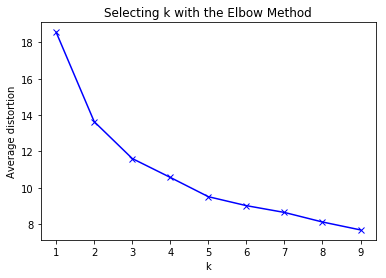

In [11]:
# Clustering to see pattaerns of drugs, age, wt, reactions, ... wihtout outcomes
X=df[['age','wt','gndr_cod']]
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [12]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(X)
df_cl = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2 = df.join(df_cl)
df2.head()

,age,wt,de,lt,ho,ds,ca,ri,ot,gndr_cod,...,drugname_viread,drugname_voltaren,drugname_vx-222,drugname_vx-950,drugname_vx-950 (telaprevir),drugname_xolox /00816701/,drugname_z-pegylated interferon-2a,drugname_z-ribavirin,drugname_zepatier,cluster
0,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df2['cluster'].value_counts()

0    10281
1     8849
2     3409
Name: cluster, dtype: int64

In [27]:
df2.corr()['de'].sort_values()

ho                                                                                -0.060860
drugname_incivek                                                                  -0.057817
wt                                                                                -0.035085
ds                                                                                -0.034802
drugname_ribasphere                                                               -0.033392
drugname_vx-950 (telaprevir)                                                      -0.031830
drugname_pegasys                                                                  -0.028160
drugname_ribavirin                                                                -0.027633
cluster                                                                           -0.024036
drugname_ribapak                                                                  -0.018237
drugname_pegintron                                                              

In [32]:
df2[df2['cluster']==0].corr()['de'].sort_values(ascending=False).head(10)

de                                                                                 1.000000
lt                                                                                 0.337439
drugname_pegetron                                                                  0.171989
drugname_ribavirin 200 mg                                                          0.152398
gndr_cod                                                                           0.149152
drugname_sovaldi                                                                   0.132261
age                                                                                0.123463
drugname_viraferon                                                                 0.098080
drugname_pegetron (peginterferon alfa-2b w/ribavirin) (pegylated interferon alf    0.089823
drugname_exviera                                                                   0.089089
Name: de, dtype: float64

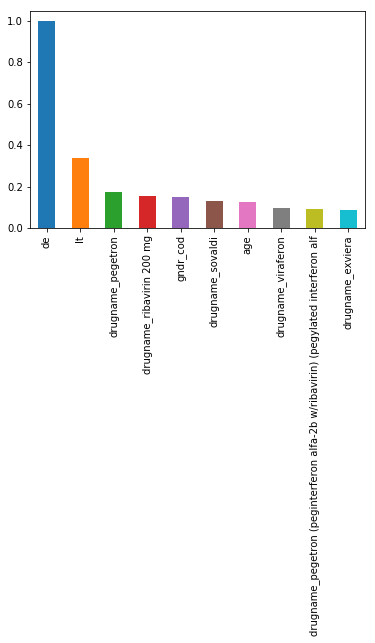

In [33]:
df2[df2['cluster']==0].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

In [25]:
df2[df2['cluster']==1].corr()['de'].sort_values(ascending=False)

de                                                                      1.000000
drugname_pegylated interferon alpha 2b                                  0.175142
drugname_neo-minophagen c                                               0.153567
drugname_dasabuvir                                                      0.134136
gndr_cod                                                                0.133653
drugname_ritonavir                                                      0.132786
drugname_peg-interferon (peginterferon alfa-2b) injectable powder       0.128476
drugname_urso 250                                                       0.084854
lt                                                                      0.083056
drugname_ombitasvir/paritaprevir/ritonavir                              0.077835
drugname_rebetol                                                        0.064028
age                                                                     0.055078
drugname_famotidine         

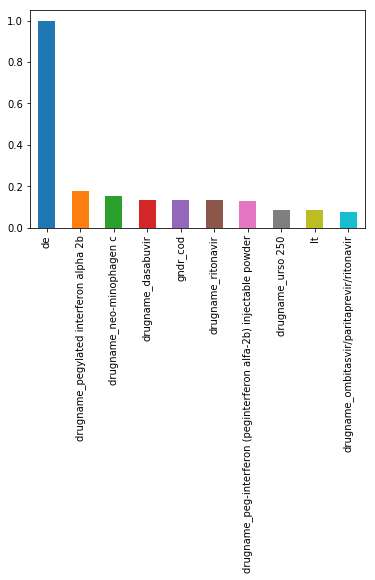

In [34]:
df2[df2['cluster']==1].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

In [24]:
df2[df2['cluster']==2].corr()['de'].sort_values(ascending=False)

de                                                                          1.000000
drugname_urso                                                               0.259469
drugname_ribasphere ribapak                                                 0.247706
drugname_peg interferon alpha-2a                                            0.236827
drugname_olysio                                                             0.152180
wt                                                                          0.061739
drugname_ledipasvir/sofosbuvir                                              0.060012
drugname_peg-interferon alfa 2a                                             0.048788
ot                                                                          0.036369
drugname_sofosbuvir                                                         0.034805
age                                                                         0.032839
drugname_daklinza                                                

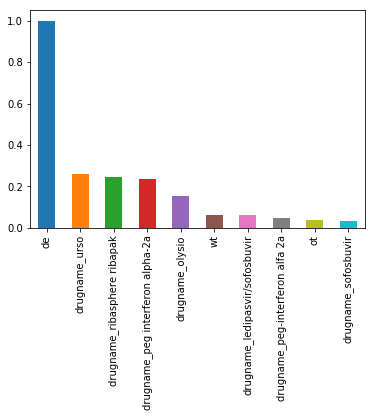

In [35]:
df2[df2['cluster']==2].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

In [19]:
y=df2['de']
X=df2.drop(['wt','gndr_cod','age','de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=50, class_weight='balanced')    #building 50 decision trees
clf1.fit(X_train, y_train)
print "Death model"
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))

Death model
0.7821650399290151
[[1705  454]
 [  37   58]]


## Model Building

In [24]:
y=df['de']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=50, class_weight='balanced',n_jobs=-1, oob_score=True)    #building 50 decision trees
clf1.fit(X_train, y_train)
print "Death model"
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))

Death model
0.9880212954747116
[[2145   14]
 [  13   82]]


In [25]:
print clf1.oob_score_

0.9871826472763126


In [9]:
y=df['de']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=50, class_weight='balanced')    #building 50 decision trees
clf1.fit(X_train, y_train)
print "Death model"
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))
print "======================================================="
y=df['lt']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf2 = RandomForestClassifier(n_estimators=50, class_weight='balanced')    #building 50 decision trees
clf2.fit(X_train, y_train)
print "Life threating model"
print metrics.accuracy_score(y_test, clf2.predict(X_test))

print metrics.confusion_matrix(y_test, clf2.predict(X_test))
print "======================================================="

y=df['ho']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf3 = RandomForestClassifier(n_estimators=50, class_weight='balanced')    #building 50 decision trees
clf3.fit(X_train, y_train)
print "Hospitalization model"
print metrics.accuracy_score(y_test, clf3.predict(X_test))

print metrics.confusion_matrix(y_test, clf3.predict(X_test))
print "======================================================="

y=df['ds']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf4 = RandomForestClassifier(n_estimators=50, class_weight='balanced')    #building 50 decision trees
clf4.fit(X_train, y_train)
print "Disability model"
print metrics.accuracy_score(y_test, clf4.predict(X_test))

print metrics.confusion_matrix(y_test, clf4.predict(X_test))
print "======================================================="

y=df['ot']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf5 = RandomForestClassifier(n_estimators=50, class_weight='balanced')    #building 50 decision trees
clf5.fit(X_train, y_train)
print "Other Serious issues model"
print metrics.accuracy_score(y_test, clf5.predict(X_test))

print metrics.confusion_matrix(y_test, clf5.predict(X_test))
print "======================================================="

X_test=X_test.reset_index(drop=True)

Death model
0.9875776397515528
[[2145   14]
 [  14   81]]
Life threating model
0.9822537710736469
[[2128   29]
 [  11   86]]
Hospitalization model
0.9401064773735581
[[1661   82]
 [  53  458]]
Disability model
0.9849157054125999
[[2166   27]
 [   7   54]]
Other Serious issues model
0.9290150842945873
[[1667  107]
 [  53  427]]


In [13]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [14]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [15]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [16]:
grid_search_wrapper()

Best params for precision_score
{'max_features': 10, 'min_samples_split': 5, 'n_estimators': 100, 'max_depth': 25}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg      2159         0
pos        87         8


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 10], 'n_estimators': [100, 300], 'max_depth': [3, 5, 15, 25], 'max_features': [3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit='precision_score',
       return_train_score=True,
       scoring={'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score)},
       verbose=0)

## Function creating

In [17]:
def drug_recommender(age,wt,gndr):
    

    x=np.zeros(X_test.loc[0].shape)
    out=pd.DataFrame(columns={'drug','score'})
    min_prob=1.0
    min_prob_i=3
    for i in range(3,365):
        x = np.zeros(x.shape)
        x[0]=age
        x[1]=wt
        x[2]=gndr
        x[i]=1
        pred=10*clf1.predict_proba(x.reshape(1, -1))[0][1]+3*clf2.predict_proba(x.reshape(1, -1))[0][1]+2*clf3.predict_proba(x.reshape(1, -1))[0][1]+1.5*clf4.predict_proba(x.reshape(1, -1))[0][1]+clf5.predict_proba(x.reshape(1, -1))[0][1]
        prob=pred
        if prob <= min_prob:
            min_prob=prob
            min_prob_i=i
        out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'score':[pred]}))
    out=out.sort_values(['score'])
    print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
    print "=============================================="
    return out.head()

## Tesing

In [19]:
drug_recommender(78,58,0)

Recommended Drug: olysio


,drug,score
0,drugname_olysio,0.650802
0,drugname_peg-intron,0.685953
0,drugname_incivek,0.780000
0,drugname_ribasphere,0.850000
0,drugname_ribavirine,0.900000


## Reaction predictive model

In [17]:
df.head()

,drugname,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,pt
0,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,accident at home
1,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,anaemia
2,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,asthenia
3,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,blood pressure fluctuation
4,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,body temperature decreased


In [19]:
df['pt'].value_counts().head()

no reaction    742
fatigue        652
nausea         621
anaemia        597
diarrhoea      353
Name: pt, dtype: int64

In [21]:
df['anaemia']=0.0
df.loc[df['pt']=='anaemia', 'anaemia'] = 1.0
df.head()

,drugname,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,pt,anaemia
0,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,accident at home,0.0
1,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,anaemia,1.0
2,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,asthenia,0.0
3,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,blood pressure fluctuation,0.0
4,pegasys,65.0,1.0,85.0,0,0,1,0,0,0,0,body temperature decreased,0.0


In [22]:
dummy_col = pd.get_dummies(df[['drugname','gndr_cod']])
df=df.drop(['drugname','gndr_cod','pt'] , axis=1)
df = pd.concat([df, dummy_col], axis=1)
df.head()

,age,wt,de,lt,ho,ds,ca,ri,ot,anaemia,...,drugname_virazide,drugname_viread,drugname_voltaren,drugname_vx-222,drugname_vx-950,drugname_vx-950 (telaprevir),drugname_xolox /00816701/,drugname_z-pegylated interferon-2a,drugname_z-ribavirin,drugname_zepatier
0,65.0,85.0,0,0,1,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,65.0,85.0,0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,85.0,0,0,1,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,65.0,85.0,0,0,1,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,85.0,0,0,1,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
